In [1]:
import seaborn as sns
import pandas as pd
import requests
import zipfile
import io
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = {
        "name": "bank",
        "url": "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip",
        "categorical_columns": "job,marital,education,default,housing,loan,contact,month,poutcome,yesno", 
        "columns":"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yesno",
        "target": "yesno",
        "header": "t",
        "sep": ";",
        "imbalanced": "t",
        "zipped": "t",
        "zip_name": "bank-full.csv"
    }

sep = dataset['sep']
index_col = False
names = dataset['columns'].split(',')
r = requests.post(dataset['url']) if dataset['zipped'] == 'f' else requests.get(dataset['url'])
z = None if dataset['zipped'] == 'f' else zipfile.ZipFile(io.BytesIO(r.content))
skiprow = 1 if dataset['header'] == "t" else 0
if r.ok:
	data = io.StringIO(r.content.decode('utf8')) if dataset['zipped'] == 'f' else z.open(dataset['zip_name'])
	df = pd.read_csv(data, names=names, sep=sep, index_col=index_col, skiprows=skiprow)
else:
	raise "Unable to retrieve dataset: " + dataset

def select_column(scol):
	return scol.split(',')
    
encoders = {}
if dataset['categorical_columns'] != "":
	for column in select_column(dataset['categorical_columns']):
		encoders[column] = LabelEncoder()
		df[column] = encoders[column].fit_transform(df[column])

In [3]:
bank = df
bank_ctgan = pd.read_csv("results/ctgan_10_bank_dpbench_run_dataset.csv", index_col=0)
bank_patectgan = pd.read_csv("results/patectgan_10_bank_dpbench_run_dataset.csv", index_col=0)
bank_wpatectdragan = pd.read_csv("results/wpatectdragan_10_bank_dpbench_run_dataset.csv", index_col=0)

In [4]:
bank.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210      4.339762      1.167725      1.224813      0.018027   
std       10.618762      3.272657      0.608230      0.747997      0.133049   
min       18.000000      0.000000      0.000000      0.000000      0.000000   
25%       33.000000      1.000000      1.000000      1.000000      0.000000   
50%       39.000000      4.000000      1.000000      1.000000      0.000000   
75%       48.000000      7.000000      2.000000      2.000000      0.000000   
max       95.000000     11.000000      2.000000      3.000000      1.000000   

             balance       housing          loan       contact           day  \
count   45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     1362.272058      0.555838      0.160226      0.640242     15.806419   
std      3044.765829      0.496878      0.366820      0.897951      8.322476   
min     -8019.000000      0.000000      0.000000      0.000000      1.000000   
25%        72.000000      0.000000      0.000000      0.000000      8.000000   
50%       448.000000      1.000000      0.000000      0.000000     16.000000   
75%      1428.000000      1.000000      0.000000      2.000000     21.000000   
max    102127.000000      1.000000      1.000000      2.000000     31.000000   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       5.523014    258.163080      2.763841     40.197828      0.580323   
std        3.006911    257.527812      3.098021    100.128746      2.303441   
min        0.000000      0.000000      1.000000     -1.000000      0.000000   
25%        3.000000    103.000000      1.000000     -1.000000      0.000000   
50%        6.000000    180.000000      2.000000     -1.000000      0.000000   
75%        8.000000    319.000000      3.000000     -1.000000      0.000000   
max       11.000000   4918.000000     63.000000    871.000000    275.000000   

           poutcome         yesno  
count  45211.000000  45211.000000  
mean       2.559974      0.116985  
std        0.989059      0.321406  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

In [5]:
bank_ctgan.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.680747      3.908474      1.257482      1.256154      0.032934   
std       11.101663      3.203568      0.565460      0.759406      0.178467   
min       16.869834      0.000000      0.000000      0.000000      0.000000   
25%       31.956346      1.000000      1.000000      1.000000      0.000000   
50%       40.292312      4.000000      1.000000      1.000000      0.000000   
75%       46.920084      7.000000      2.000000      2.000000      0.000000   
max       90.936867     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     823.596925      0.543894      0.143195      0.674062     15.074771   
std     1733.378552      0.498075      0.350276      0.908572      7.998547   
min    -4716.706674      0.000000      0.000000      0.000000      0.124637   
25%       -3.006957      0.000000      0.000000      0.000000      8.148456   
50%      220.964621      1.000000      0.000000      0.000000     14.941421   
75%      958.791479      1.000000      0.000000      2.000000     20.179712   
max    30420.561049      1.000000      1.000000      2.000000     32.371101   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       5.473203    226.540103      2.645939     51.143447      0.692842   
std        3.120461    210.453850      2.498007    101.359661      1.475196   
min        0.000000    -47.285810      0.966785     -2.021323     -0.016355   
25%        3.000000     93.282698      1.004057     -1.110377      0.000255   
50%        6.000000    168.912966      2.000367     -0.896126      0.003936   
75%        8.000000    295.325127      3.004404     -0.382420      0.011527   
max       11.000000   2038.698129     26.954610    382.497586     10.785709   

           poutcome         yesno  
count  45211.000000  45211.000000  
mean       2.454668      0.127027  
std        1.026758      0.333006  
min        0.000000      0.000000  
25%        3.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

In [6]:
bank_patectgan.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.654111      4.555197      1.133021      1.295680      0.031696   
std       10.489651      3.337331      0.643172      0.777295      0.175191   
min       15.828622      0.000000      0.000000      0.000000      0.000000   
25%       32.929894      1.000000      1.000000      1.000000      0.000000   
50%       38.983818      4.000000      1.000000      1.000000      0.000000   
75%       47.879644      8.000000      2.000000      2.000000      0.000000   
max       99.019861     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean    1265.871181      0.574086      0.140541      0.133596     14.241919   
std     2301.715092      0.494486      0.347551      0.404768      7.921296   
min    -9881.974101      0.000000      0.000000      0.000000     -0.967764   
25%       89.000229      0.000000      0.000000      0.000000      7.622907   
50%      623.287788      1.000000      0.000000      0.000000     14.596777   
75%     1593.767195      1.000000      0.000000      0.000000     19.795755   
max    41729.542345      1.000000      1.000000      2.000000     33.091377   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       5.812214    232.990265      1.817935    155.713073      2.877402   
std        3.464988    220.838070      1.338007     96.815746      2.439478   
min        0.000000    -61.580746      0.927864    -83.808453     -0.022826   
25%        3.000000     96.808442      1.003412     87.416201      1.062719   
50%        6.000000    179.021925      1.038648    161.314580      2.048324   
75%        9.000000    296.881458      2.023521    192.271426      3.201598   
max       11.000000   2808.982377     36.690126    653.117087     17.651036   

           poutcome         yesno  
count  45211.000000  45211.000000  
mean       0.574307      0.188848  
std        0.790442      0.391392  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        3.000000      1.000000

In [7]:
bank_wpatectdragan.describe()

age           job       marital     education       default  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean      41.998180      4.597664      1.150362      1.259450      0.053306   
std       11.212633      3.426911      0.613204      0.810633      0.224645   
min       16.117963      0.000000      0.000000      0.000000      0.000000   
25%       33.403825      1.000000      1.000000      1.000000      0.000000   
50%       40.489020      4.000000      1.000000      1.000000      0.000000   
75%       49.947554      8.000000      2.000000      2.000000      0.000000   
max       99.509517     11.000000      2.000000      3.000000      1.000000   

            balance       housing          loan       contact           day  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean    1319.079916      0.592466      0.134657      0.419610     16.530109   
std     2822.701191      0.491381      0.341361      0.754439      8.767749   
min   -12826.132631      0.000000      0.000000      0.000000     -0.817067   
25%       29.647425      0.000000      0.000000      0.000000      9.466062   
50%      470.561005      1.000000      0.000000      0.000000     16.201163   
75%     1670.719736      1.000000      0.000000      1.000000     24.112441   
max    41940.228462      1.000000      1.000000      2.000000     33.205535   

              month      duration      campaign         pdays      previous  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       5.991971    322.492717      2.681680     51.601516      0.742892   
std        3.196610    301.993224      3.200880    109.163317      1.773918   
min        0.000000    -46.268113      0.936965    -17.603162     -0.031652   
25%        4.000000    130.734343      1.013386     -1.309069     -0.004641   
50%        7.000000    223.976995      1.999251     -0.976303      0.002602   
75%        8.000000    404.393884      3.004640     -0.357122      0.960979   
max       11.000000   2496.243689     38.253329    612.946656     13.992605   

           poutcome         yesno  
count  45211.000000  45211.000000  
mean       2.349096      0.166973  
std        1.106807      0.372956  
min        0.000000      0.000000  
25%        2.000000      0.000000  
50%        3.000000      0.000000  
75%        3.000000      0.000000  
max        3.000000      1.000000

In [4]:
bank["dataset"] = "bank" 
bank_ctgan["dataset"] = "ctgan"
bank_patectgan["dataset"] = "patectgan"
bank_wpatectdragan["dataset"] = "wpatectdragan"

In [5]:
all_bank = pd.concat([bank, bank_ctgan, bank_patectgan, bank_wpatectdragan])

In [10]:
#sns.pairplot(all_bank, hue="dataset")

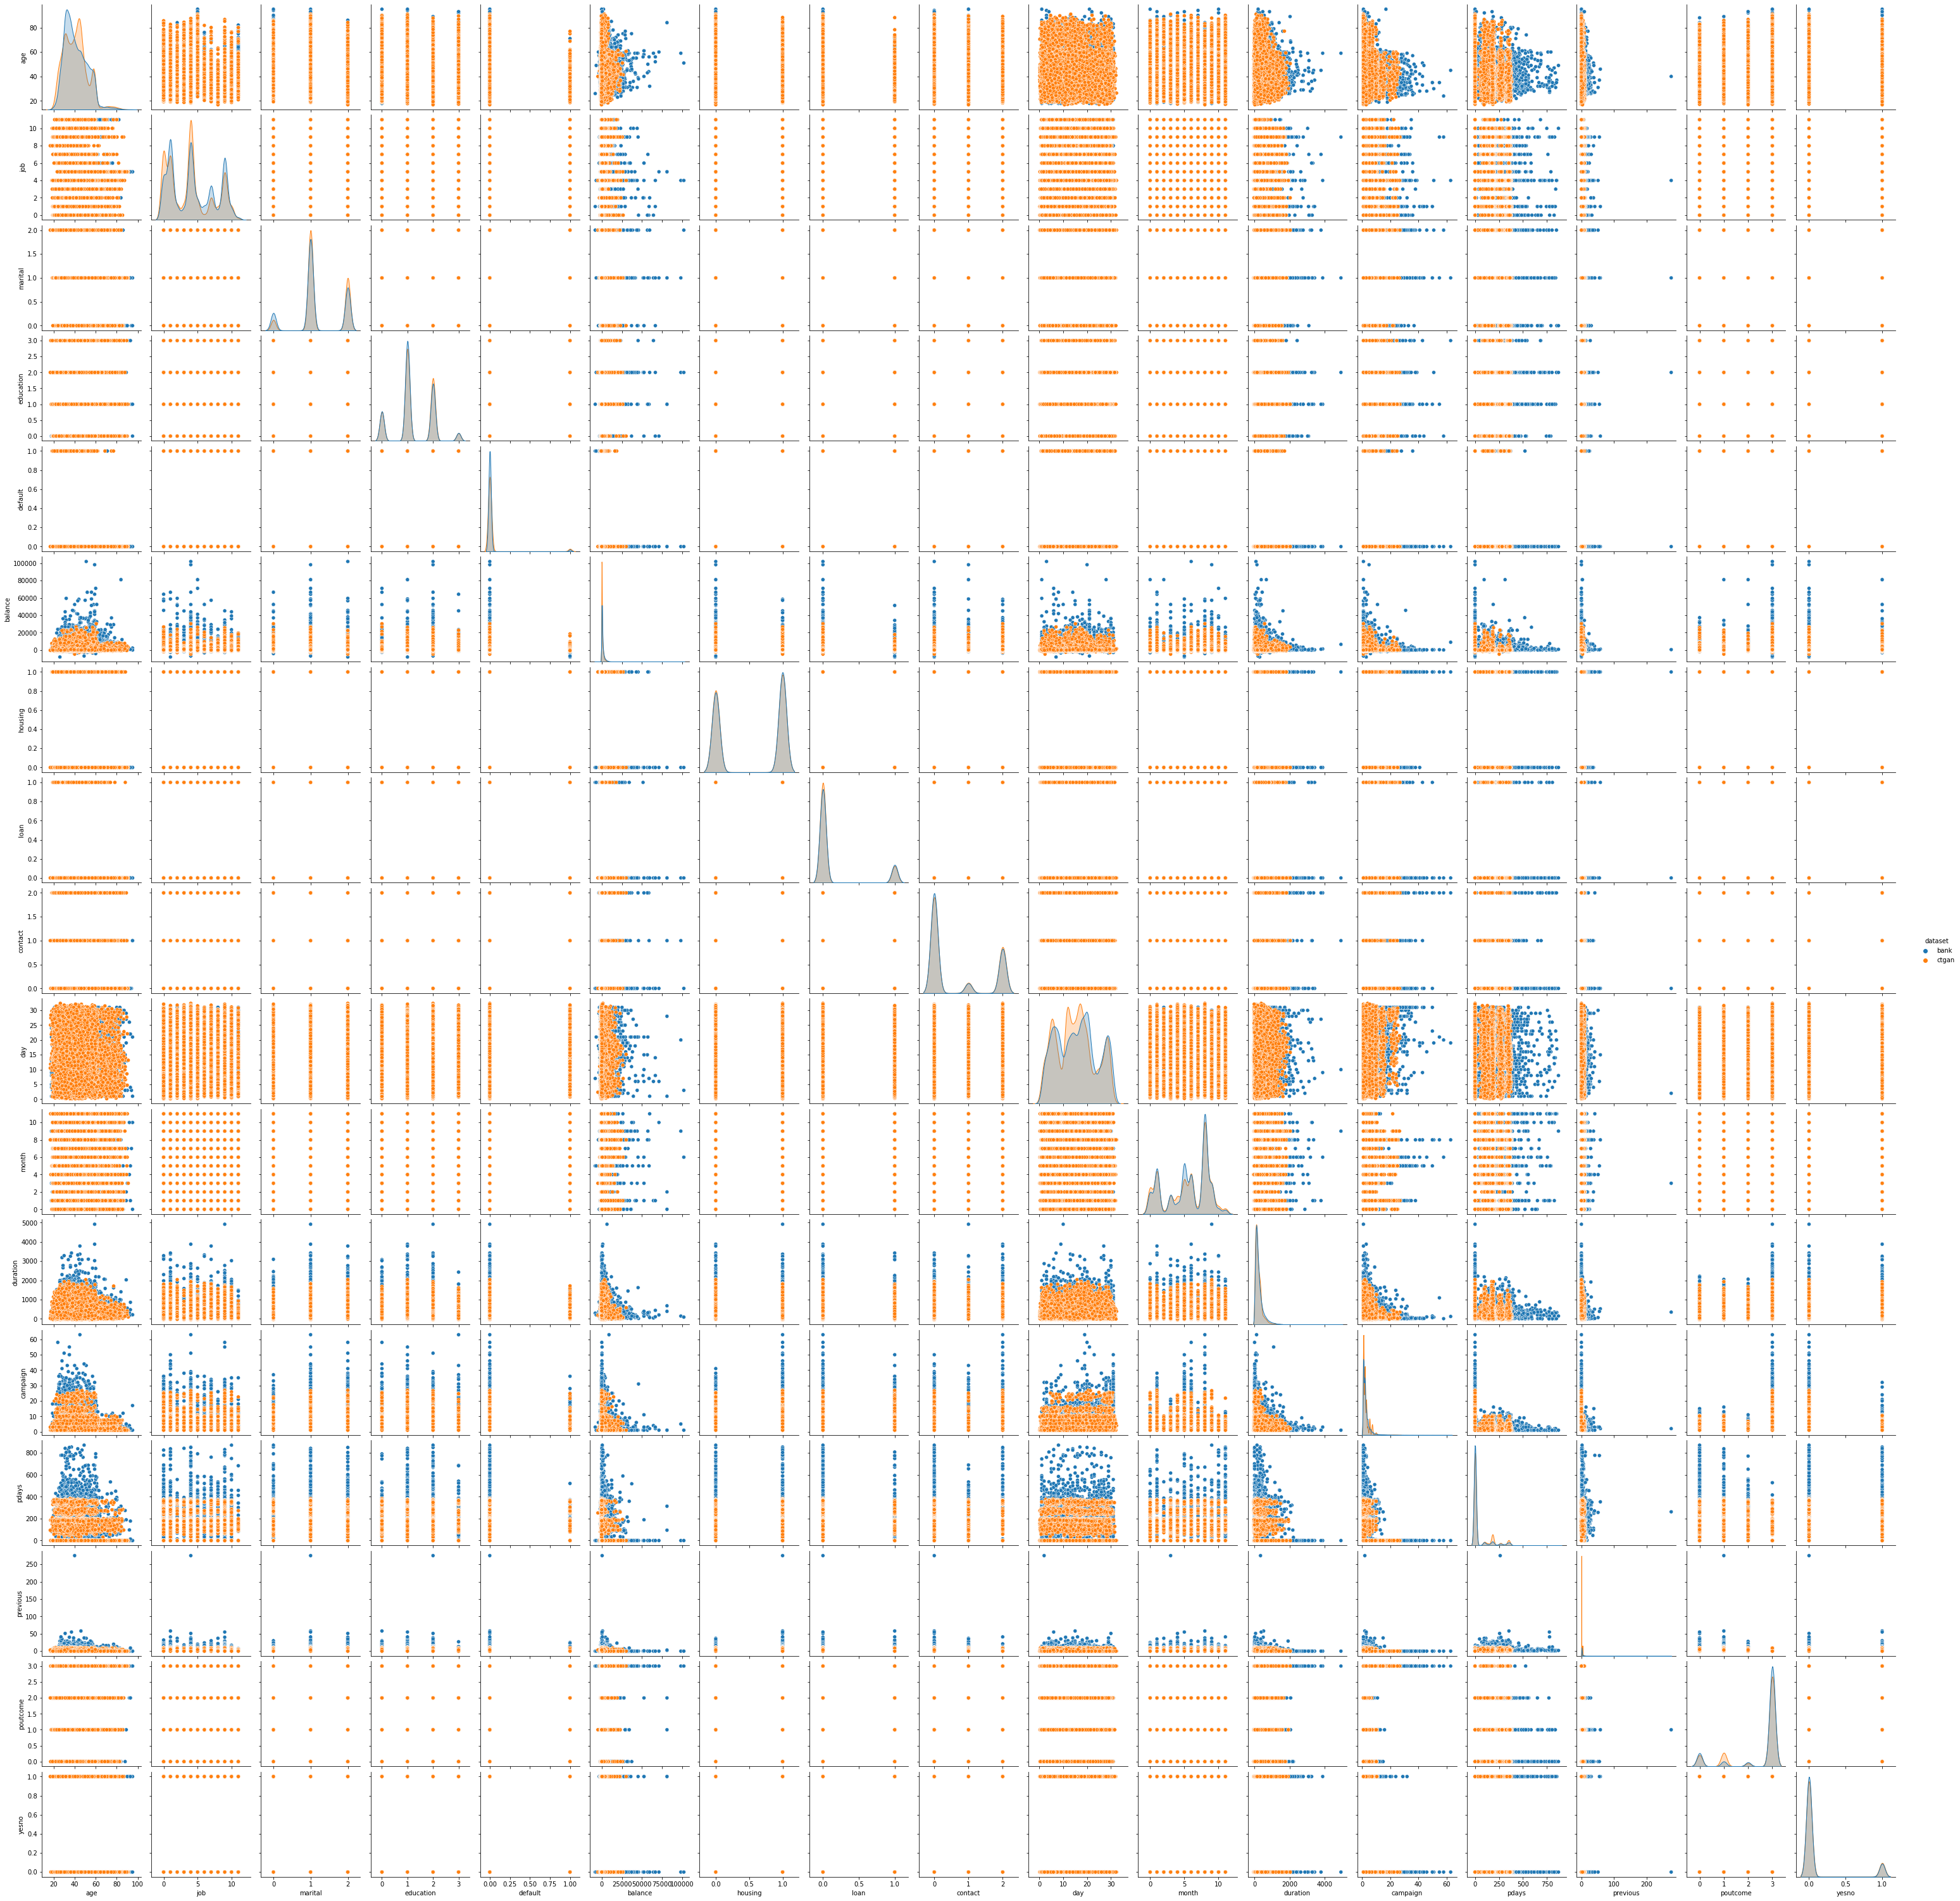

In [11]:
bank_vs_ctgan = pd.concat([bank, bank_ctgan])
sns.pairplot(bank_vs_ctgan, hue="dataset")

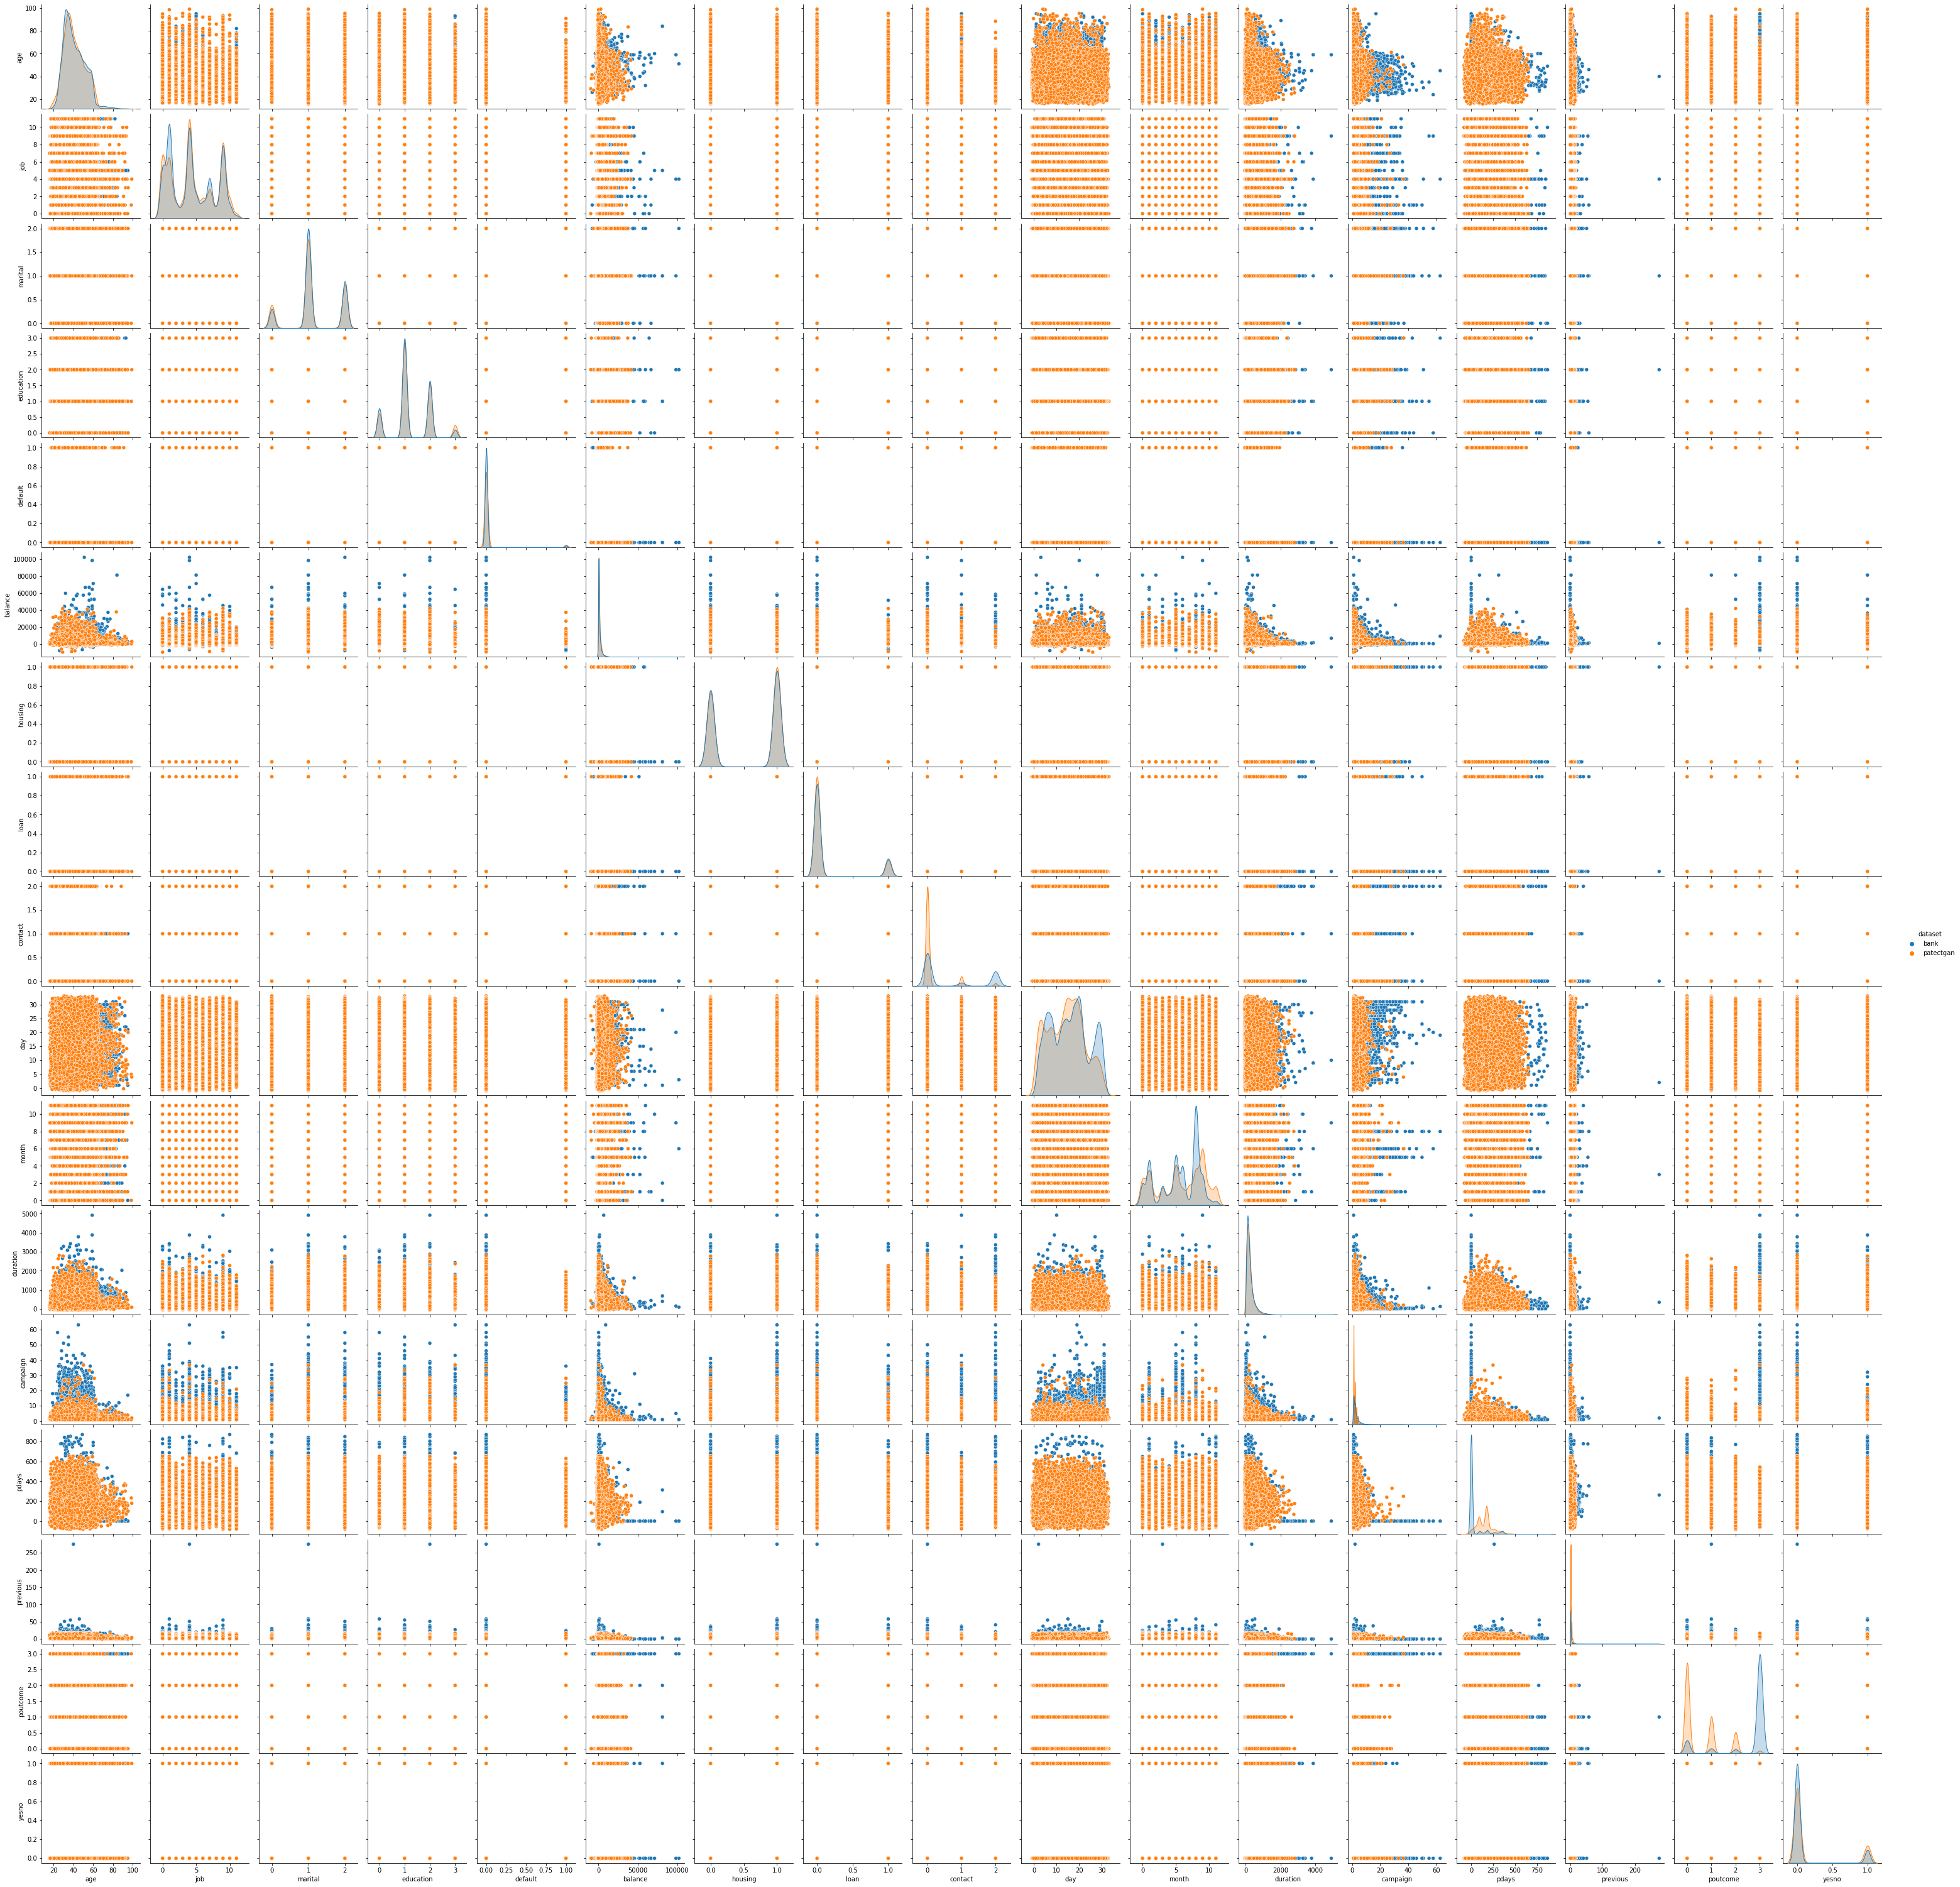

In [13]:
bank_vs_patectgan = pd.concat([bank, bank_patectgan])
sns.pairplot(bank_vs_patectgan, hue="dataset")

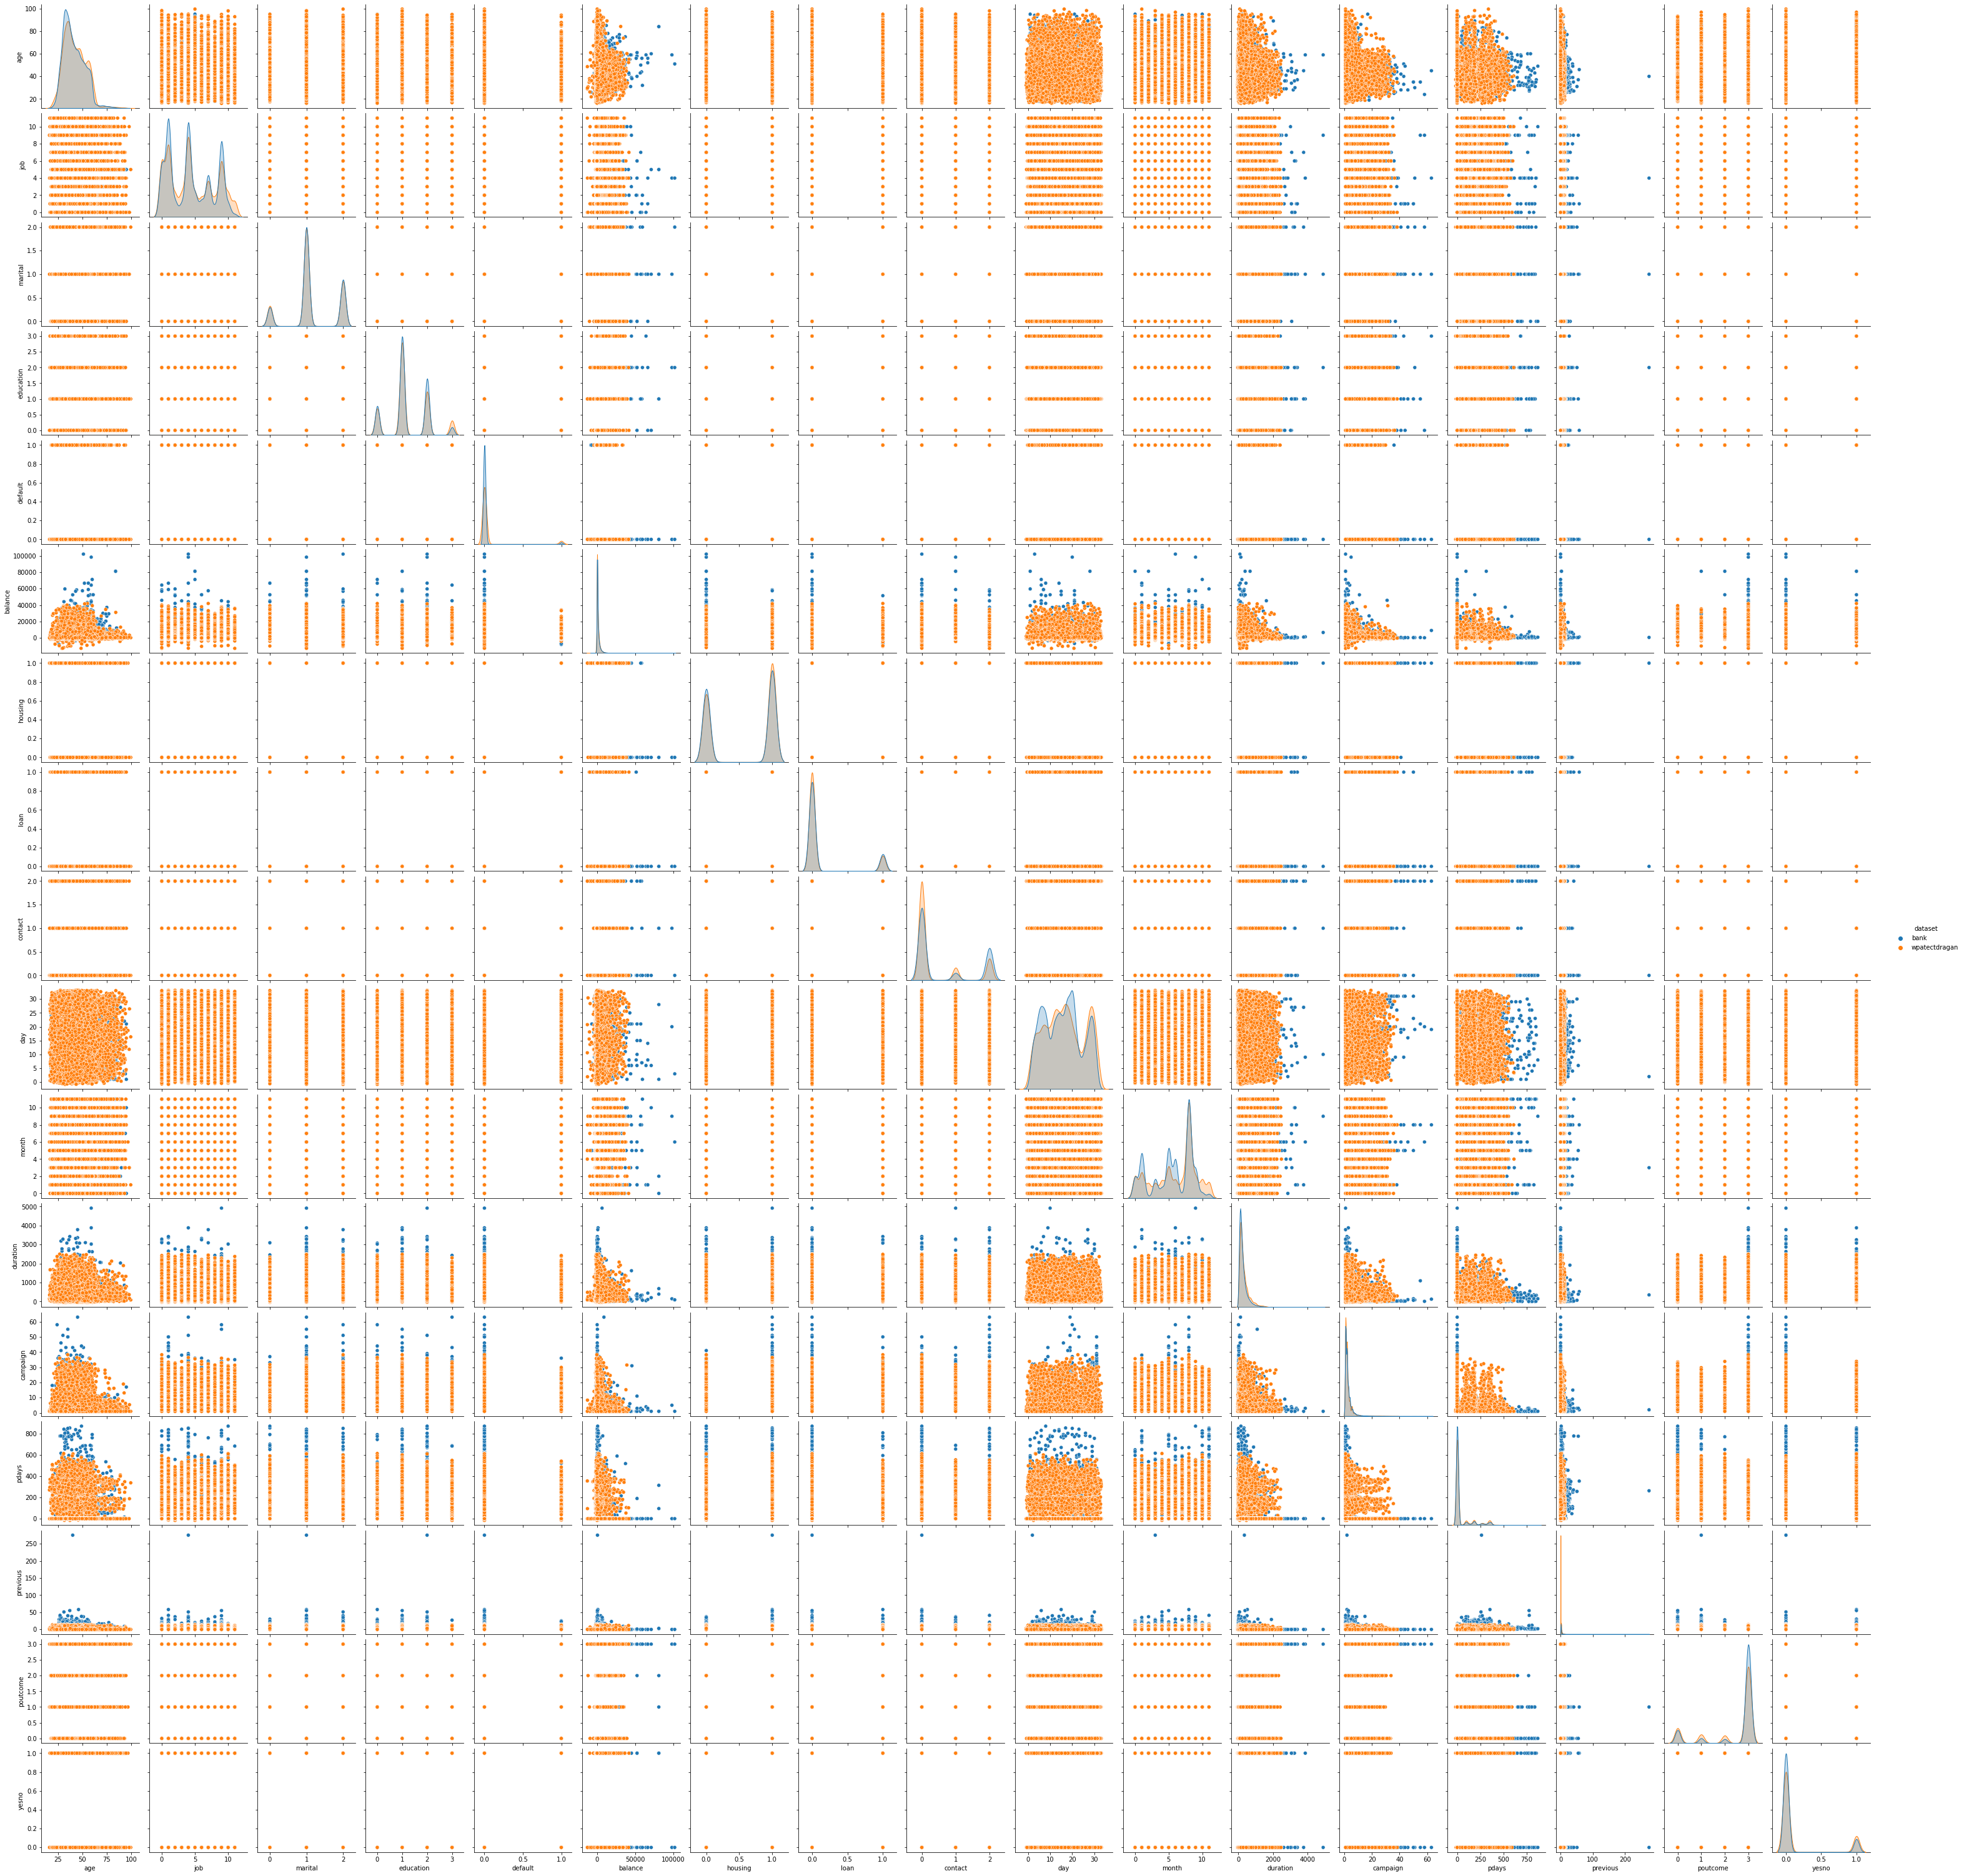

In [6]:
bank_vs_wpatectdragan = pd.concat([bank, bank_wpatectdragan])
sns.pairplot(bank_vs_wpatectdragan, hue="dataset")